Importing The Dependencies

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection And Preprocessing

In [31]:
#Loading the dataset
url = r"C:\Users\princ\OneDrive\Documents\Chapter 1\Python\Machine Learning\ML Data\CAR DETAILS FROM CAR DEKHO.csv"
df = pd.read_csv(url)

In [32]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [33]:
df.shape

(4340, 8)

In [34]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [36]:
#Checking the distribution of categorical data
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical Data

In [37]:
#Encoding the fuel
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace = True)

#Encoding the seller_type
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace = True)

#Encoding the transmission
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace = True)
df.head()

#Encoding the Owner
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace = True)

C:\Users\princ\AppData\Local\Temp\ipykernel_19240\1921291578.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace = True)
C:\Users\princ\AppData\Local\Temp\ipykernel_19240\1921291578.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace = True)
C:\Users\princ\AppData\Local\Temp\ipykernel_19240\1921291578.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated

In [38]:
#Checking the new distribution of categorical data
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
1    2153
0    2123
2      40
3      23
4       1
Name: count, dtype: int64
seller_type
0    3244
1     994
2     102
Name: count, dtype: int64
transmission
0    3892
1     448
Name: count, dtype: int64
owner
0    2832
1    1106
2     304
3      81
4      17
Name: count, dtype: int64


 Splittng the data into training and testing data

In [39]:
X = df.drop(['selling_price','name'],axis = 1)
y = df['selling_price']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

Model Training
 1. Linear Regression

In [41]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

Model Evaluation 

In [43]:
#Prediction on training data
X_train_pred = lin_reg_model.predict(X_train)
#R squared Error
error_score = metrics.r2_score(y_train,X_train_pred)
print("R Squared Error:", error_score)


R Squared Error: 0.4305890532350747


Visualising the Actual and Predicted Prices


<function matplotlib.pyplot.show(close=None, block=None)>

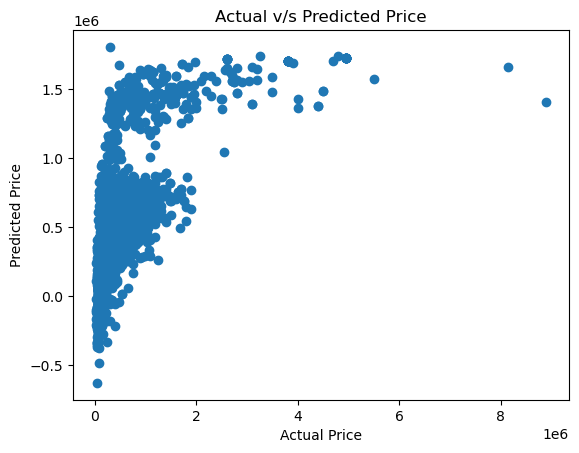

In [44]:
plt.scatter(y_train,X_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual v/s Predicted Price")
plt.show
          

In [45]:
#Prediction on testing data
X_test_pred = lin_reg_model.predict(X_test)
#R squared Error
error_score = metrics.r2_score(y_test,X_test_pred)
print("R Squared Error:", error_score)

R Squared Error: 0.4909502296425724


<function matplotlib.pyplot.show(close=None, block=None)>

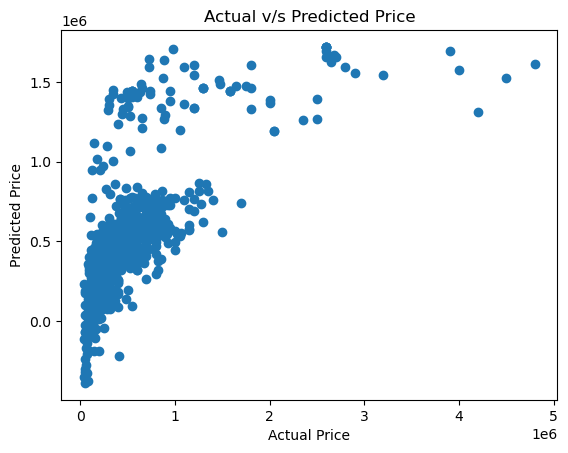

In [46]:
plt.scatter(y_test,X_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual v/s Predicted Price")
plt.show

Model Training

  2. Lasso Regression

In [47]:
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,y_train)

Lasso()

In [50]:
#Prediction on training data
X_train_lass_pred = lass_reg_model.predict(X_train)
#R squared Error
error_score = metrics.r2_score(y_train,X_train_lass_pred)
print("R Squared Error:", error_score)

R Squared Error: 0.4305890531848926


<function matplotlib.pyplot.show(close=None, block=None)>

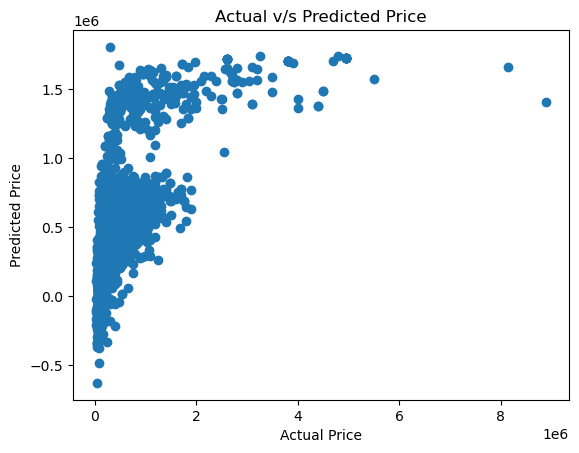

In [51]:
plt.scatter(y_train,X_train_lass_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual v/s Predicted Price")
plt.show
         

In [52]:
#Prediction on testing data
X_test_lass_pred = lass_reg_model.predict(X_test)
#R squared Error
error_score = metrics.r2_score(y_test,X_test_lass_pred)
print("R Squared Error:", error_score)

R Squared Error: 0.49095014523988934


<function matplotlib.pyplot.show(close=None, block=None)>

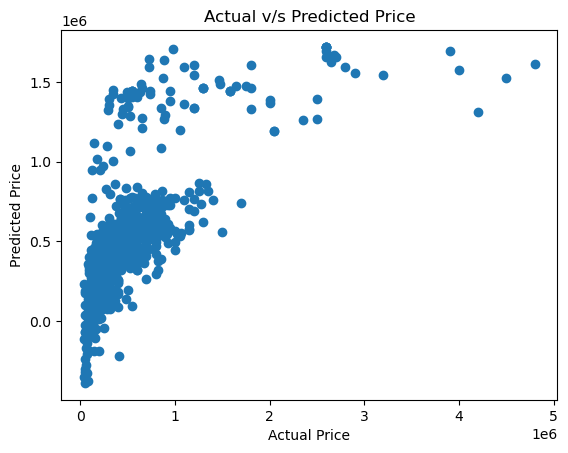

In [54]:
plt.scatter(y_test,X_test_lass_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual v/s Predicted Price")
plt.show